In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# #Importing data
# df = pd.read_csv('train.csv')
# #Printing head
# df.head()

df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])
df=df.iloc[::-1]
print(df.head())
df.index = df['Date']
del df['Date']
df.info()

df = df[['Close']]
print(df.head())

# df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
# # df = df[['Close', 'HL_PCT', 'PCT_change']]
# df = df[['Close']]
print(df.tail())

           Date    Open    High     Low   Close Volume     Market Cap
1654 2013-04-28  135.30  135.98  132.10  134.21      -  1,500,520,000
1653 2013-04-29  134.44  147.49  134.00  144.54      -  1,491,160,000
1652 2013-04-30  144.00  146.93  134.05  139.00      -  1,597,780,000
1651 2013-05-01  139.00  139.89  107.72  116.99      -  1,542,820,000
1650 2013-05-02  116.38  125.60   92.28  105.21      -  1,292,190,000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2013-04-28 to 2017-11-07
Data columns (total 6 columns):
Open          1655 non-null float64
High          1655 non-null float64
Low           1655 non-null float64
Close         1655 non-null float64
Volume        1655 non-null object
Market Cap    1655 non-null object
dtypes: float64(4), object(2)
memory usage: 90.5+ KB
             Close
Date              
2013-04-28  134.21
2013-04-29  144.54
2013-04-30  139.00
2013-05-01  116.99
2013-05-02  105.21
              Close
Date               
2017-11-03  7207

In [2]:
# df = pd.read_csv('bitcoin_price.csv',parse_dates=['Date'], nrows = 1300)
# print(df.tail())
train=df[0:1500] 
test=df[1500:]
print(train.tail())
print(test.head())
print(test.tail())

              Close
Date               
2017-06-01  2407.88
2017-06-02  2488.55
2017-06-03  2515.35
2017-06-04  2511.81
2017-06-05  2686.81
              Close
Date               
2017-06-06  2863.20
2017-06-07  2732.16
2017-06-08  2805.62
2017-06-09  2823.81
2017-06-10  2947.71
              Close
Date               
2017-11-03  7207.76
2017-11-04  7379.95
2017-11-05  7407.41
2017-11-06  7022.76
2017-11-07  7144.38


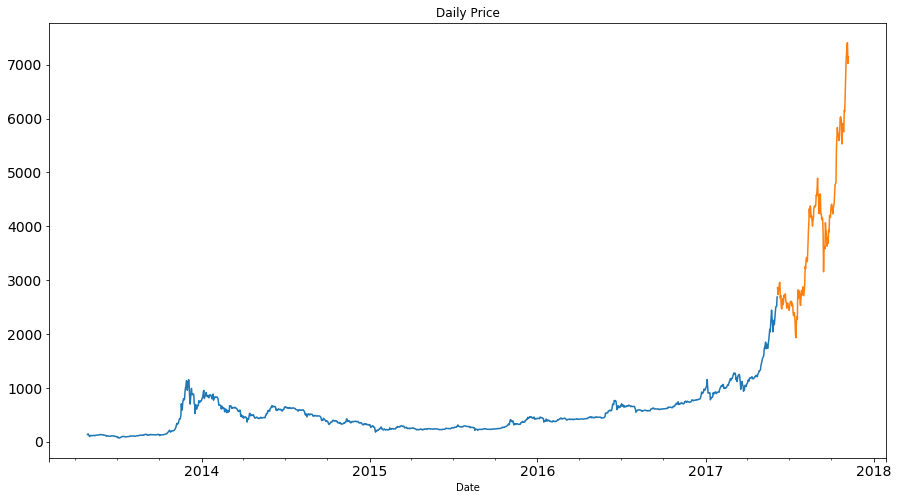

In [3]:
train.Close.plot(figsize=(15,8), title= 'Daily Price', fontsize=14)
test.Close.plot(figsize=(15,8), title= 'Daily Price', fontsize=14)
plt.show()

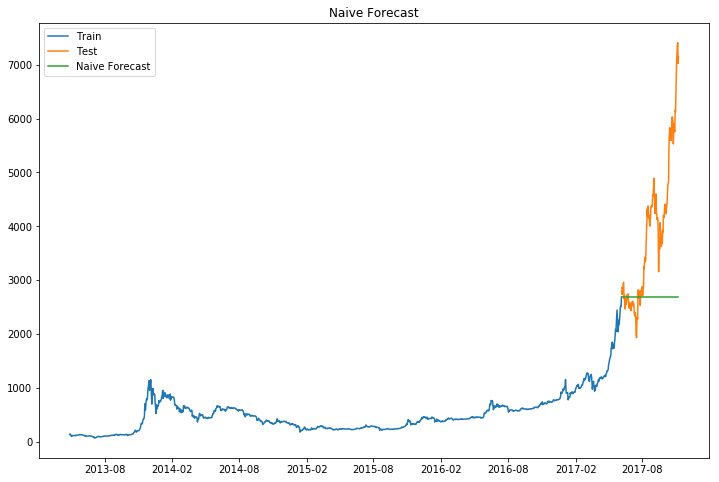

In [4]:
dd= np.asarray(train.Close)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

#ploting Graph between Train test NAIVE Approach for forecast
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Close, y_hat.naive))
print(rms)

1785.819095243268


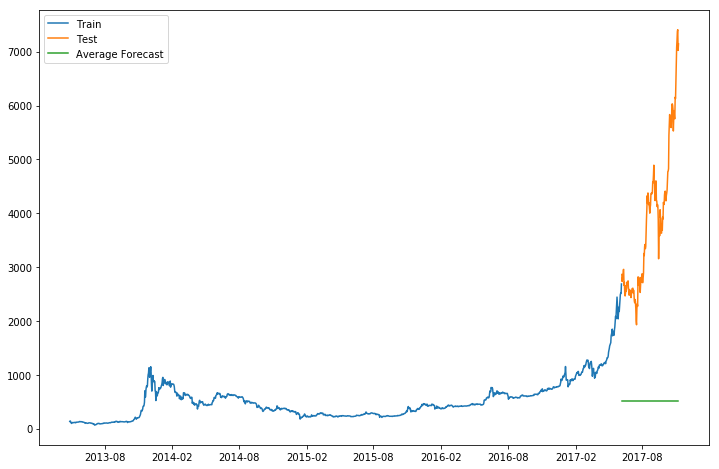

In [6]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()

plt.figure(figsize=(12,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [7]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.avg_forecast))
print(rms)

3629.001658095474


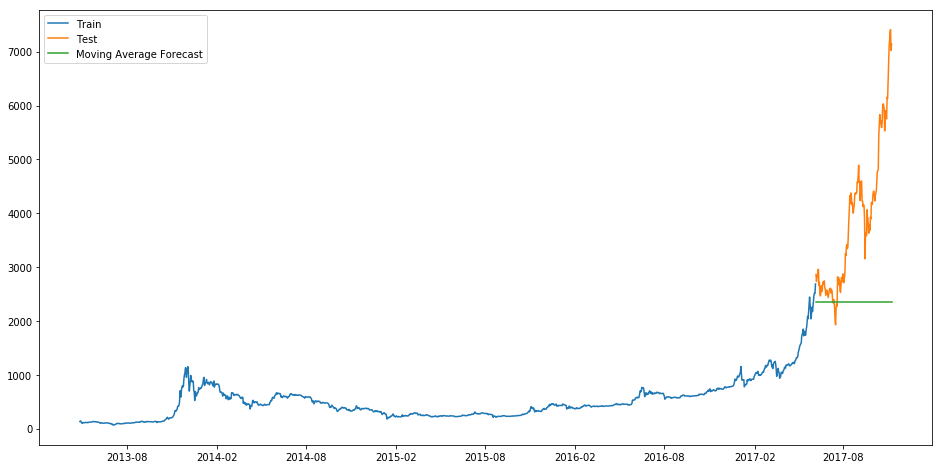

In [8]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Close'].rolling(10).mean().iloc[-1]

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [9]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.moving_avg_forecast))
print(rms)

2026.4186117619163


In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

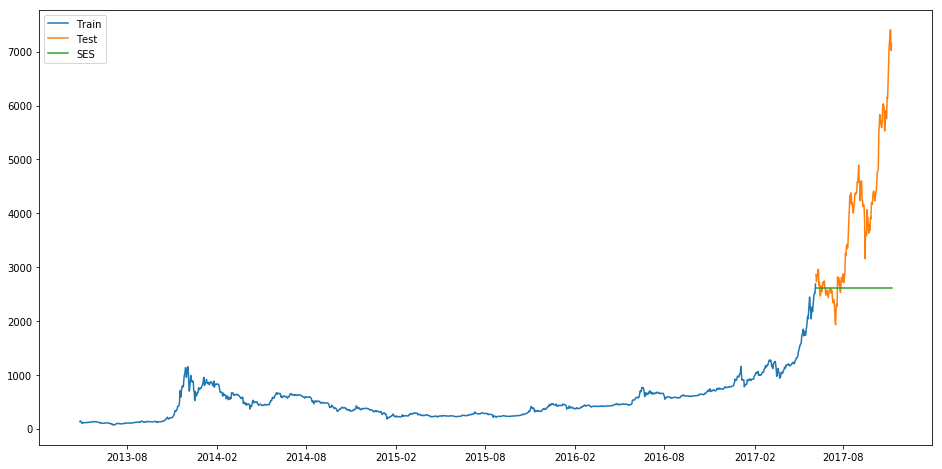

In [11]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [12]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SES))
print(rms)

1837.0992146655035


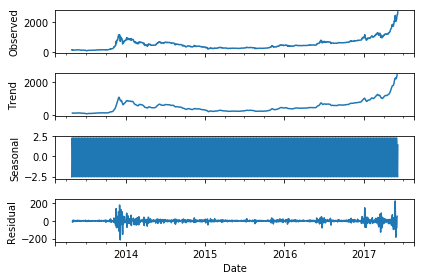

In [13]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Close).plot()
result = sm.tsa.stattools.adfuller(train.Close)
plt.show()

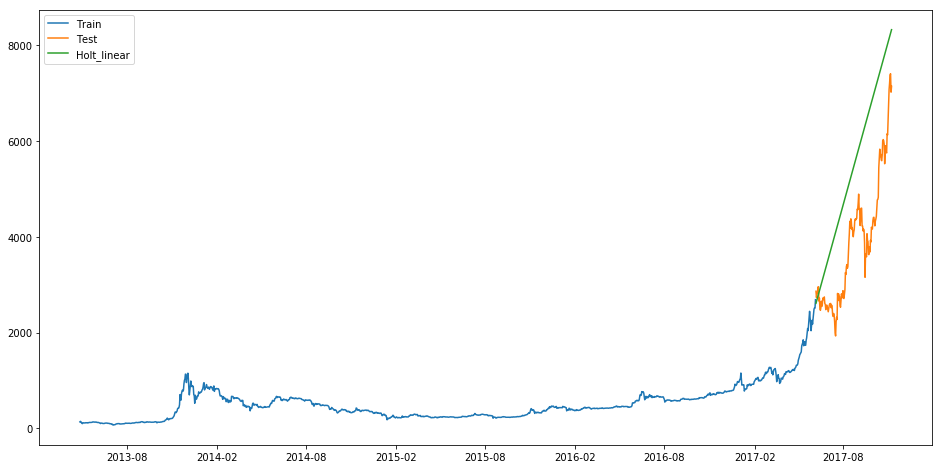

In [14]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [15]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_linear))
print(rms)

1754.2470748369246


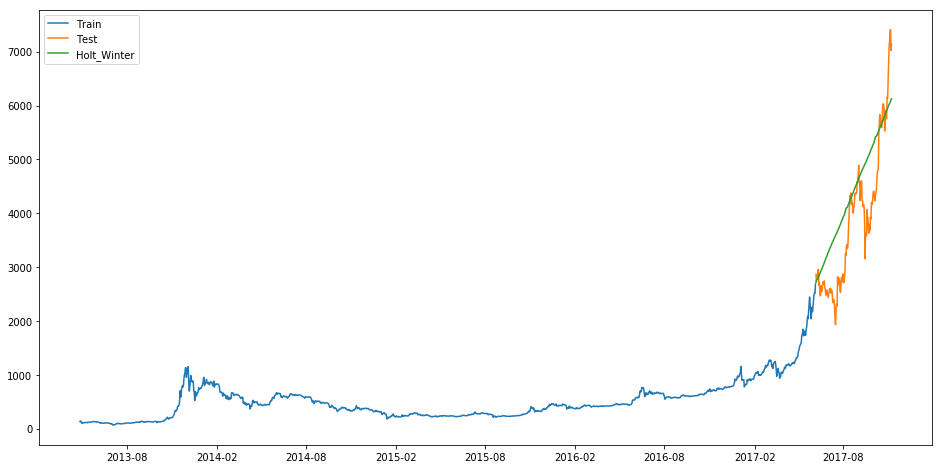

In [16]:
# y_hat_avg = test.copy()
# fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
# y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=60 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [17]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
print(rms)

808.3535921056981


In [45]:
# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 2),seasonal_order=(0,1,1,7)).fit()
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# y_hat_avg = test.copy()
# fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
# y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-04", end="2017-11-03", dynamic=True)

# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 1)).fit()
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 2),seasonal_order=(-3,0,1,3)).fit()
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit(disp=-1)
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# plt.figure(figsize=(16,8))
# plt.plot( train['Close'], label='Train')
# plt.plot(test['Close'], label='Test')
# plt.plot(y_hat_avg['SARIMA'], label='SARIMA',linewidth=3)
# plt.legend(loc='best')
# plt.show()

In [46]:
# rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SARIMA))
# print(rms)